## Analíses de Tenistas Profissionais

Aluno: Elias Faria Silva - 2018127254

GitHub: [git](https://github.com/eliasfariasilva/Tennis-Analises---ICD)

Youtube: [youtube](https://www.youtube.com/watch?v=bwVQoRwYJ-0&ab_channel=EliasFaria)

### Introdução

O tênis é um esporte de precisão e estratégia que tem conquistado uma base de fãs global. Com jogadores talentosos competindo em diversos torneios ao redor do mundo, surge a curiosidade de entender os fatores que influenciam o desempenho e o sucesso de um jogador nesse esporte altamente competitivo.

Com o surgimento e a evolução dos sistemas de classificação no tênis, o ranking se tornou uma métrica essencial para avaliar a posição e o desempenho dos jogadores profissionais. Ao investigar o impacto do ranking em um jogo de tênis, podemos compreender como a classificação influencia a mentalidade, a confiança e as estratégias adotadas pelos jogadores durante as partidas. Além disso, examinar os dados relacionados ao ranking permitirá uma análise mais abrangente sobre a consistência dos jogadores ao longo do tempo e sua capacidade de manter um desempenho competitivo.

Outro fator crítico no jogo de tênis é o saque, que desempenha um papel fundamental na determinação do resultado de uma partida. Analisar o impacto do saque é essencial para entender como os jogadores podem usar essa habilidade para obter vantagens estratégicas e controlar o ritmo do jogo. Ao explorar os dados relacionados ao desempenho do saque, poderemos identificar padrões e correlações entre a eficácia do saque e os resultados obtidos pelos jogadores.


### Perguntas

* O ranking no tênis profissional masculino é uma boa medida de classificação?
* Qual a expectativa de sets jogados por partida? 

### Dados

Para esse projeto, foi utilizado os resitórios presentes na conta git JeffSackmann. O período analisado foi de 2009, quando houve a alteração de pontuação nos torneios ATP, até 2016. Os repositórios utlizados foram:

#### tennis_atp

**Descrição:** Neste repositório foi utilizado principalmente um tipos de informações presente, divido por ano. Cada documento anual conta com informações de cada partida, com resultados de todas as partidas desde torneios challenger até torneios Grand Slam, informando placar, jogadores, ranking de cada jogador entre outros dados.

**Fonte:** [tennis_atp link](https://github.com/JeffSackmann)

### Bibliotecas Utilizadas

In [534]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Regressão
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#MLP
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Carregando os dados

In [1003]:
atp = pd.read_csv('Data.csv', encoding='latin-1', low_memory=False)
atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alguns tratamento se fazem necessários para evitar informações erradas nas analises. As datas dos jogos estão como string, é necessário alterar para formato de data. 

Os valores nulos ou não numericos das colunas referente aos rankings também devem ser trados. Nesse caso iremos substituir por 0. 

As datas devem ser filtradas para o périodo pré-definido e também selecionando apenas os torneios escolhidos.

As colunas com informações a mais que precisamos também serão removidas.

In [455]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8388 entries, 25996 to 46597
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         8388 non-null   int64         
 1   Location    8388 non-null   object        
 2   Tournament  8388 non-null   object        
 3   Date        8388 non-null   datetime64[ns]
 4   Series      8388 non-null   object        
 5   Court       8388 non-null   object        
 6   Surface     8388 non-null   object        
 7   Round       8388 non-null   object        
 8   Best of     8388 non-null   int64         
 9   Winner      8388 non-null   object        
 10  Loser       8388 non-null   object        
 11  WRank       8388 non-null   float64       
 12  LRank       8388 non-null   float64       
 13  W1          8334 non-null   float64       
 14  L1          8334 non-null   float64       
 15  W2          8248 non-null   float64       
 16  L2          8248 non-nul

In [454]:
#Convertendo as datas para ser reconhecidas como data
formato = "%d/%m/%Y"
atp['Date'] = pd.to_datetime(atp['Date'], dayfirst="TRUE")
#Removendo os valores "NR" para 0 e convertendo os rankings para numerico
atp['WRank'].replace('NR', 0, inplace=True)
atp['LRank'].replace('NR', 0, inplace=True)
atp['WRank'] = pd.to_numeric(atp['WRank'])
atp['LRank'] = pd.to_numeric(atp['LRank'])

atp['WRank'].fillna(0, inplace=True)
atp['LRank'].fillna(0, inplace=True)

# Filtrando os dados para datas acima de 2008 e selecionando também apenas os torneiosmais relevantes do circuito.
data = atp.loc[atp['Date']>'31/12/2008']
data = data.loc[data['Series'].isin(['Masters 1000', 'Grand Slam', ])]

#Filtrando apenas as colunas que serão utilizadas
data = data[['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets']]
data.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets
25996,6,Melbourne,Australian Open,2009-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Ferrer D.,...,6.0,7.0,6.0,1.0,6.0,7.0,6.0,4.0,3.0,2.0
25997,6,Melbourne,Australian Open,2009-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Berdych T.,...,6.0,4.0,6.0,3.0,NaN,NaN,NaN,NaN,3.0,0.0
25998,6,Melbourne,Australian Open,2009-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Mayer F.,...,6.0,1.0,6.0,2.0,NaN,NaN,NaN,NaN,3.0,0.0
25999,6,Melbourne,Australian Open,2009-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Hrbaty D.,...,2.0,6.0,6.0,2.0,7.0,5.0,NaN,NaN,3.0,1.0
26000,6,Melbourne,Australian Open,2009-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Soderling R.,...,6.0,4.0,6.0,4.0,7.0,5.0,NaN,NaN,3.0,1.0


In [1005]:
data['Date'].max()

Timestamp('2016-09-11 00:00:00')

A partir da analise das informações do dataset resultante, pode-se perceber que as informçãoes sobre os jogos estão completas, apenas o placar de 54 partidas estão vazios, representando 99,35% dos dados completos. 

#### Gráfico de Dispersão

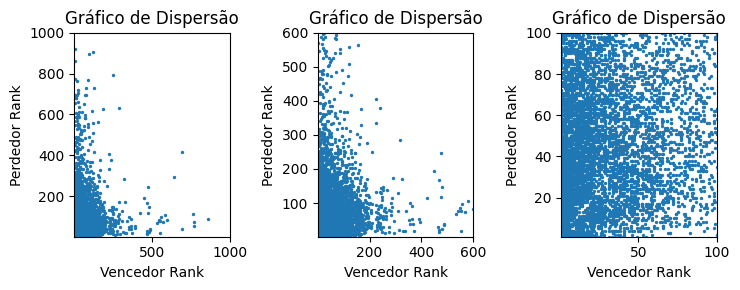

In [549]:
# Criar a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(7.5, 3))

# Plotar o primeiro gráfico

# Criar o gráfico de dispersão
axs[0].scatter(data['WRank'], data['LRank'], s=2)
# Configurar os rótulos dos eixos
axs[0].set_xlabel('Vencedor Rank')
axs[0].set_ylabel('Perdedor Rank')
axs[0].set_title('Gráfico de Dispersão')
# Limitar os valores exibidos no eixo x até 1000
axs[0].set_xlim(1, 1000)
axs[0].set_ylim(1, 1000)

# Plotar o segundo gráfico
# Criar o gráfico de dispersão
axs[1].scatter(data['WRank'], data['LRank'], s=2)
# Limitar os valores exibidos no eixo x até 600
axs[1].set_xlim(1, 600)
axs[1].set_ylim(1, 600)

# Configurar os rótulos dos eixos
axs[1].set_xlabel('Vencedor Rank')
axs[1].set_ylabel('Perdedor Rank')
axs[1].set_title('Gráfico de Dispersão')

# Plotar o terceiro gráfico
# Criar o gráfico de dispersão
axs[2].scatter(data['WRank'], data['LRank'], s=2)

# Limitar os valores exibidos no eixo x até 600
axs[2].set_xlim(1, 100)
axs[2].set_ylim(1, 100)

# Configurar os rótulos dos eixos
axs[2].set_xlabel('Vencedor Ranking')
axs[2].set_ylabel('Perdedor Ranking')
axs[2].set_title('Gráfico de Dispersão')


# Ajustar o layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

Com os gráficos de dispersão apresentados, podemos observar que, nos torneios previstos, que aproxima da parte positiva de uma hiperbole. Apresentando uma tendência inicial dos rankings menores serem favoritos.

#### Histogramas

In [550]:
#Separando os datasets em jogos melhor de 5 sets e melhor de 3 sets.
data5sets = data.loc[data['Best of'] == 5 ]
data3sets = data.loc[data['Best of'] == 3 ]

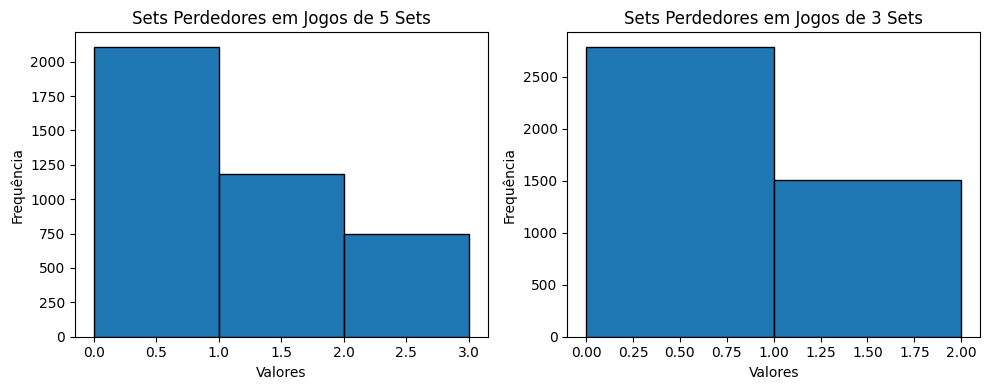

In [551]:
# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotar o primeiro gráfico

# Criar o histograma
axs[0].hist(data5sets['Lsets'], edgecolor='black', bins= [0, 1, 2, 3])

# Configurar os rótulos e título do gráfico
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Sets Perdedores em Jogos de 5 Sets')

# Plotar o segundo gráfico
# Criar o histograma
axs[1].hist(data3sets['Lsets'], edgecolor='black', bins= [0, 1, 2])

# Configurar os rótulos e título do gráfico
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Sets Perdedores em Jogos de 3 Sets')

# Ajustar o layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

No histograma dos sets dos jogadores perdededores, mostra que é mais comum jogos com vitoria em sets diretos do que jogos mais disputados, com uma distribuição da vitória dos sets maiores.

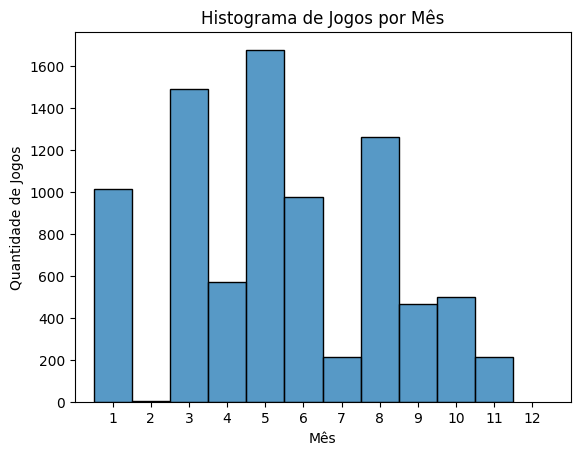

In [459]:
# Plotar o histograma usando Seaborn com discrete=True
sns.histplot(data=data, x=data['Date'].dt.month, bins=range(1, 14), edgecolor='black', discrete=True)

# Configurar os rótulos e título do gráfico
plt.xlabel('Mês')
plt.ylabel('Quantidade de Jogos')
plt.title('Histograma de Jogos por Mês')

plt.xlim(0,13)

# Ajustar os rótulos do eixo x
plt.xticks(range(1, 13))

# Exibir o gráfico
plt.show()

Pelo histograma dos jogos por meses, pode perceber tendência de 3 momentos durante o ano de jogos. O primeiro momento em Janeiro, com uma quantidade significativa de jogos nesse mês, o segundo momento entre março e junho, com a maioria dos jogos do ano nesse periodo e, após uma diminuição de jogos em Julho, a fase final da temporada entre Agosto e Novembro, com um ritmo de jogos já menor após o mês de Agosto.

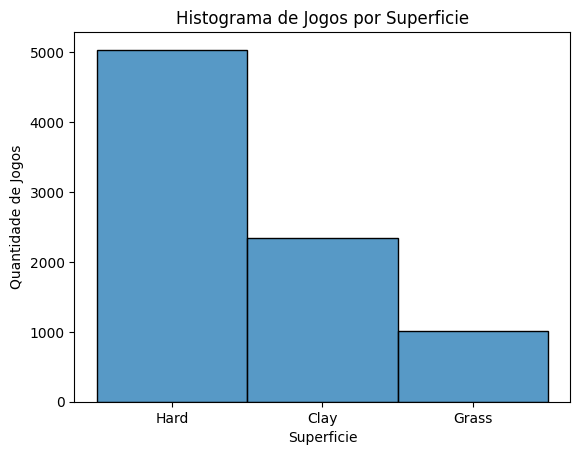

In [1019]:
# Plotar o histograma usando Seaborn com discrete=True
sns.histplot(data=data, x=data['Surface'], bins='auto', edgecolor='black', discrete=True)

# Configurar os rótulos e título do gráfico
plt.xlabel('Superficie')
plt.ylabel('Quantidade de Jogos')
plt.title('Histograma de Jogos por Superficie')


# Exibir o gráfico
plt.show()

No histograma de jogos por superficie, podemos perceber uma maior quantidade em jogos em quadra rapida, com mais do dobro do segundo piso mais comum, o saibro. E por último, grama mostra ser um piso menos comum, apesar do torneio mais tradicional do tênis ser na grama.

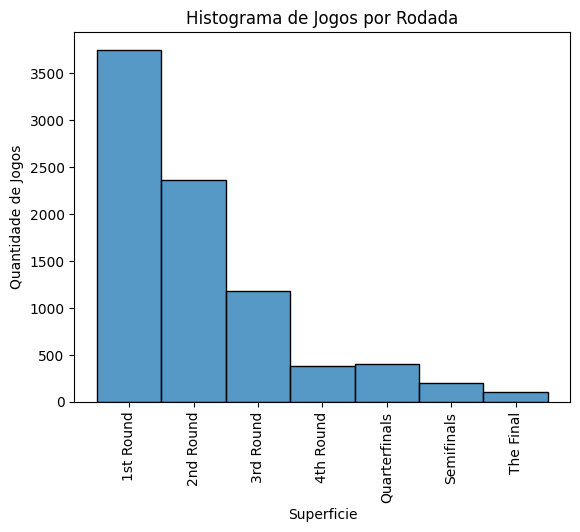

In [1020]:
# Plotar o histograma usando Seaborn com discrete=True
sns.histplot(data=data, x=data['Round'], bins='auto', edgecolor='black', discrete=True)

# Configurar os rótulos e título do gráfico
plt.xlabel('Superficie')
plt.ylabel('Quantidade de Jogos')
plt.title('Histograma de Jogos por Superficie')
plt.xticks(rotation= '90')
plt.xlim(-0.5,10.5)

# Exibir o gráfico
plt.show()

E finalmente, um histograma com resultados mais óbvios. A quantidade de jogos em cada fase diminui de acordo com o estágio que cada fase representa.

### Analises

Inicialmente, iremos definir alguns parâmetros base, para que seja possível analisar com maior base os resultados apresentados futuramente. Dois parâmetros serão os mais importantes.
O primeiro deles é a mediana do ranking dos jogadores, podendo então entender o que seria um jogador acima da média e um jogador abaixo da média no caso estudado. 
E, em seguida, a têndencia de um jogador com menor ranking vencer um jogador de ranking maior. Esse parâmetro será essencial para tentarmos identificar tendências nos resultados. Chamaremos esse indicie de favoritismo.

In [1021]:
MediaRankVencedor = data['WRank'].median()
MediaRankPerdedor = data['LRank'].median()
print("Ranking Mediano dos Vencedores: {:.0f}".format(MediaRankVencedor))
print("Ranking Mediano do Perdedores: {:.0f}".format(MediaRankPerdedor))

Ranking Mediano dos Vencedores: 23
Ranking Mediano do Perdedores: 51


In [1022]:
count = 0
for i in range(len(data)):
    if data['WRank'].iloc[i] < data['LRank'].iloc[i]:
        count = count +1
rate = count/len(data)
print("Favoritismo: {:.2f}%".format(rate * 100))

Favoritismo: 70.62%


#### Separação dos grupos de rankings

Para fazer as analises de tendências, separamos os rankings em grupos, coforme tabela abaixo.

In [1023]:
RankingsGroup = pd.DataFrame({'MinRank': [1, 4, 11,31,101,301,501,1001], 'MaxRank': [3, 10, 30,100,300,500,1000,10000]})
RankingsGroup

,MinRank,MaxRank
0,1,3
1,4,10
2,11,30
3,31,100
4,101,300
5,301,500
6,501,1000
7,1001,10000


### Tendências no favoritismo

Para tentar encontrar algum padrão, ou alguma situação que o ranking não mostre relavância, iremos separar os dados pelos fatores abaixo e observar a taxa de favoritismo e anlisar a hipotese considerada.

1. Entre Grupos: Será observado o aproveitamento do favoritismo entre os grupos de ranking definido anteriormente
   Hipotese: Quanto maior a distância entre os grupos, maior o aproveitamento.
   
2. Estágio do Torneio: Será observado o aproveitamento de acordo com o avanço das fases do torneio.
   Hipotese: Quanto maior a fase do torneio menor o aproveitamento do favoritismo
   
3. Superficie: Será comparado o aproveitamento de acordo com cada superficie
   Hipotese: Superficies mais rápidas, tendem a ter um aproveitamento do favoritismo maior. 

#### Favoritismo Geral por Grupo

In [1024]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
        ((data['WRank']<=RankingsGroup['MaxRank'].iloc[j]) & (data['WRank']>=RankingsGroup['MinRank'].iloc[j]) &
        (data['LRank']<=RankingsGroup['MaxRank'].iloc[k]) & (data['LRank']>=RankingsGroup['MinRank'].iloc[k])) | 
        ((data['WRank']<=RankingsGroup['MaxRank'].iloc[k]) & (data['WRank']>=RankingsGroup['MinRank'].iloc[k]) &
        (data['LRank']<=RankingsGroup['MaxRank'].iloc[j]) & (data['LRank']>=RankingsGroup['MinRank'].iloc[j]))
]
        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)

In [1025]:
result2 = []
for i in range(8):
    data_aux = result.loc[result['LGroup']==i]
    rate = data_aux['countW'].sum()/(data_aux['countL'].sum() + data_aux['countW'].sum())
    rate = rate *100
    result2.append({
    'WGroup': -1,
    'LGroup': i,
    'countW': countW,
    'countL': countL,
    'Rate': rate
    })
result2 = pd.DataFrame(result2)

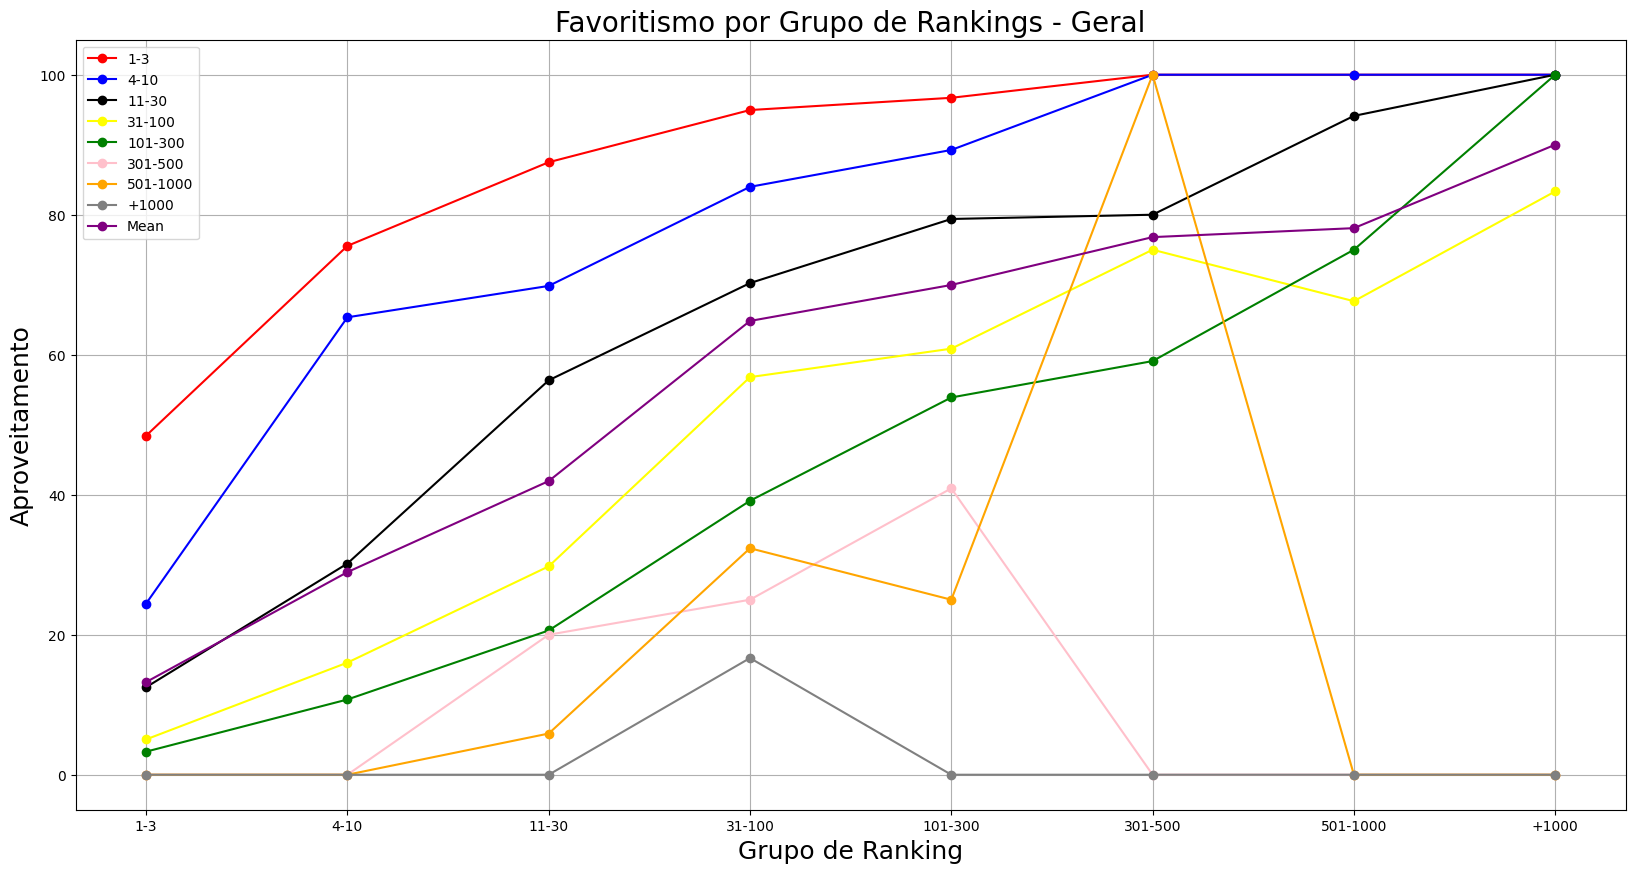

In [1026]:
title = 'Favoritismo por Grupo de Rankings - Geral' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.plot(labels, result2['Rate'], label='Mean', color = 'purple',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

A primeira analise mostrou uma forte tendência de maior aproveitamento de acordo com grupos com ranking maiores. E cada grupo com rankings menores também mostrou uma tendência de aproveitamento maior.

#### Favoritismo Por Estágio do Torneio

In [1027]:
result = []
Stages = data['Round'].unique()
for k in range(len(RankingsGroup)):
    for j in range(len(Stages)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == Stages[j])) | (((data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & 
            (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) & (data['Round'] == Stages[j]))
        ]
        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'countW': countW,
            'countL': countL,
            'Group': k,
            'Stage': Stages[j],
            'Rate': rate
            })

result = pd.DataFrame(result)

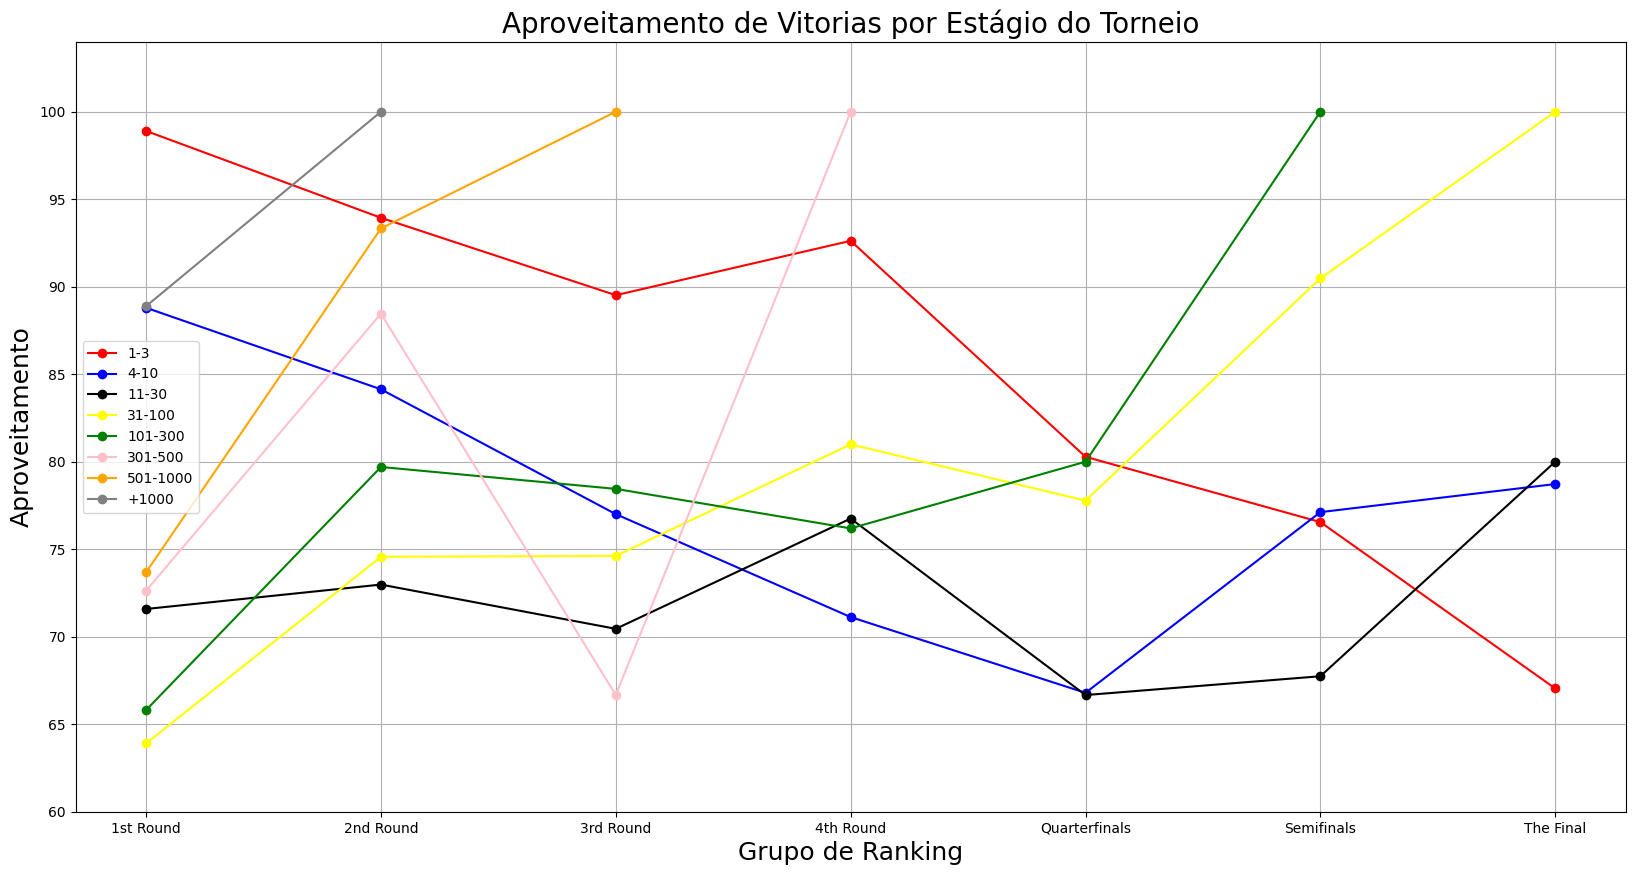

In [1028]:
title = 'Aproveitamento de Vitorias por Estágio do Torneio' 
f, ax = plt.subplots(figsize=(20, 10))

ax.plot(result.loc[result['Group']==0]['Stage'].unique(), result.loc[result['Group']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(result.loc[result['Group']==1]['Stage'].unique(), result.loc[result['Group']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(result.loc[result['Group']==2]['Stage'].unique(), result.loc[result['Group']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(result.loc[result['Group']==3]['Stage'].unique(), result.loc[result['Group']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(result.loc[result['Group']==4]['Stage'].unique(), result.loc[result['Group']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(result.loc[result['Group']==5]['Stage'].unique(), result.loc[result['Group']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(result.loc[result['Group']==6]['Stage'].unique(), result.loc[result['Group']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(result.loc[result['Group']==7]['Stage'].unique(), result.loc[result['Group']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_ylim(60,104)
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

O aproveitamento por estágio nos mostrou alguns pontos interessantes. Analisando a linha do Ranking 1-3 vemos uma clara tendência de menor aproveitamento de acordo com a evolução do torneio. A linha do Ranking 4-10 nos mostra a mesma tendência da linha anterior. Ponto interessante a ser analisado é que até as quartas de finais, esse grupo tende a ser favorito de seus jogos, porém, a partir da semifinal, tendem a enfrentar jogadores do grupo 1-3, logo, há uma alteração na tendência do gráfico. As demais linhas do gráfico, tiveram uma tendência de crescimento, que pode ser explicado com o aumento da diferença entre os ranking de acordo com o decorrer do torneio. Outro fator que reforça essa afirmativa é que grupos com rankings maiores nem apresentam jogos em estágios mais avançados.

#### Favoritismo por Estágio do Torneio Entre os Grupos

Nesse momento será feito a analise da combinação dos dois casos apresentados anteriormente.

**1ª Rodada**

In [ ]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[j]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == '1st Round')) |
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[j])) &
             (data['Round'] == '1st Round'))
        ]

        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)


In [ ]:
title = 'Aproveitamento de Vitorias por Grupo de Rankings - Primeira Rodada' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

**2ª Rodada**

In [469]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[j]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == '2nd Round')) |
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[j])) &
             (data['Round'] == '2nd Round'))
        ]

        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)

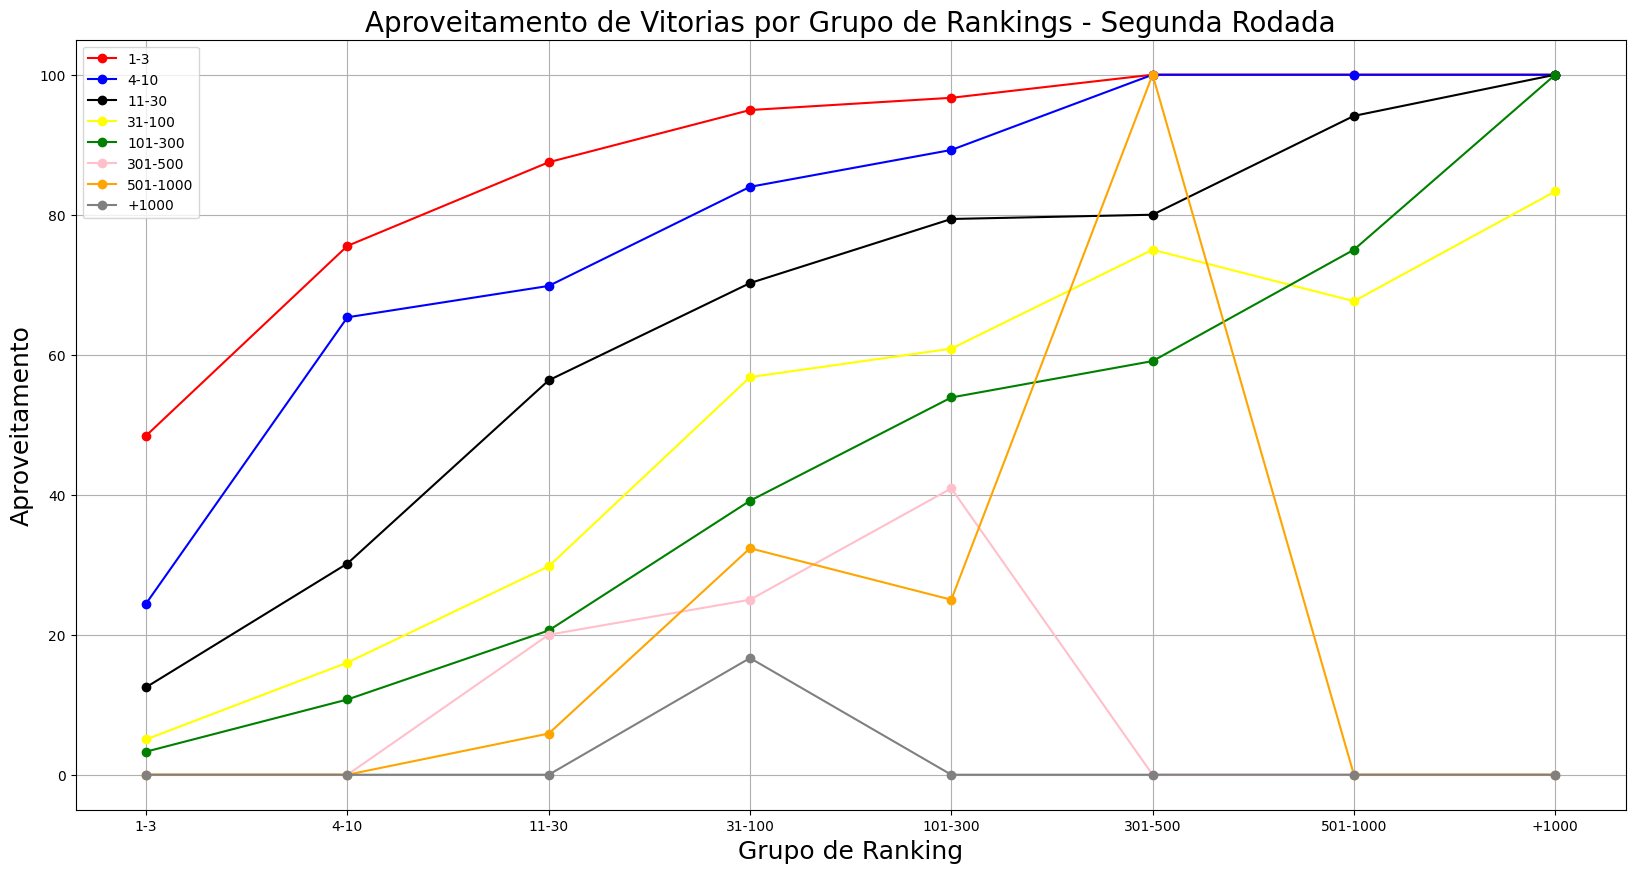

In [569]:
title = 'Aproveitamento de Vitorias por Grupo de Rankings - Segunda Rodada' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

**3ª Rodada**

In [471]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[j]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == '3rd Round')) |
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[j])) &
             (data['Round'] == '3rd Round'))
        ]

        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)

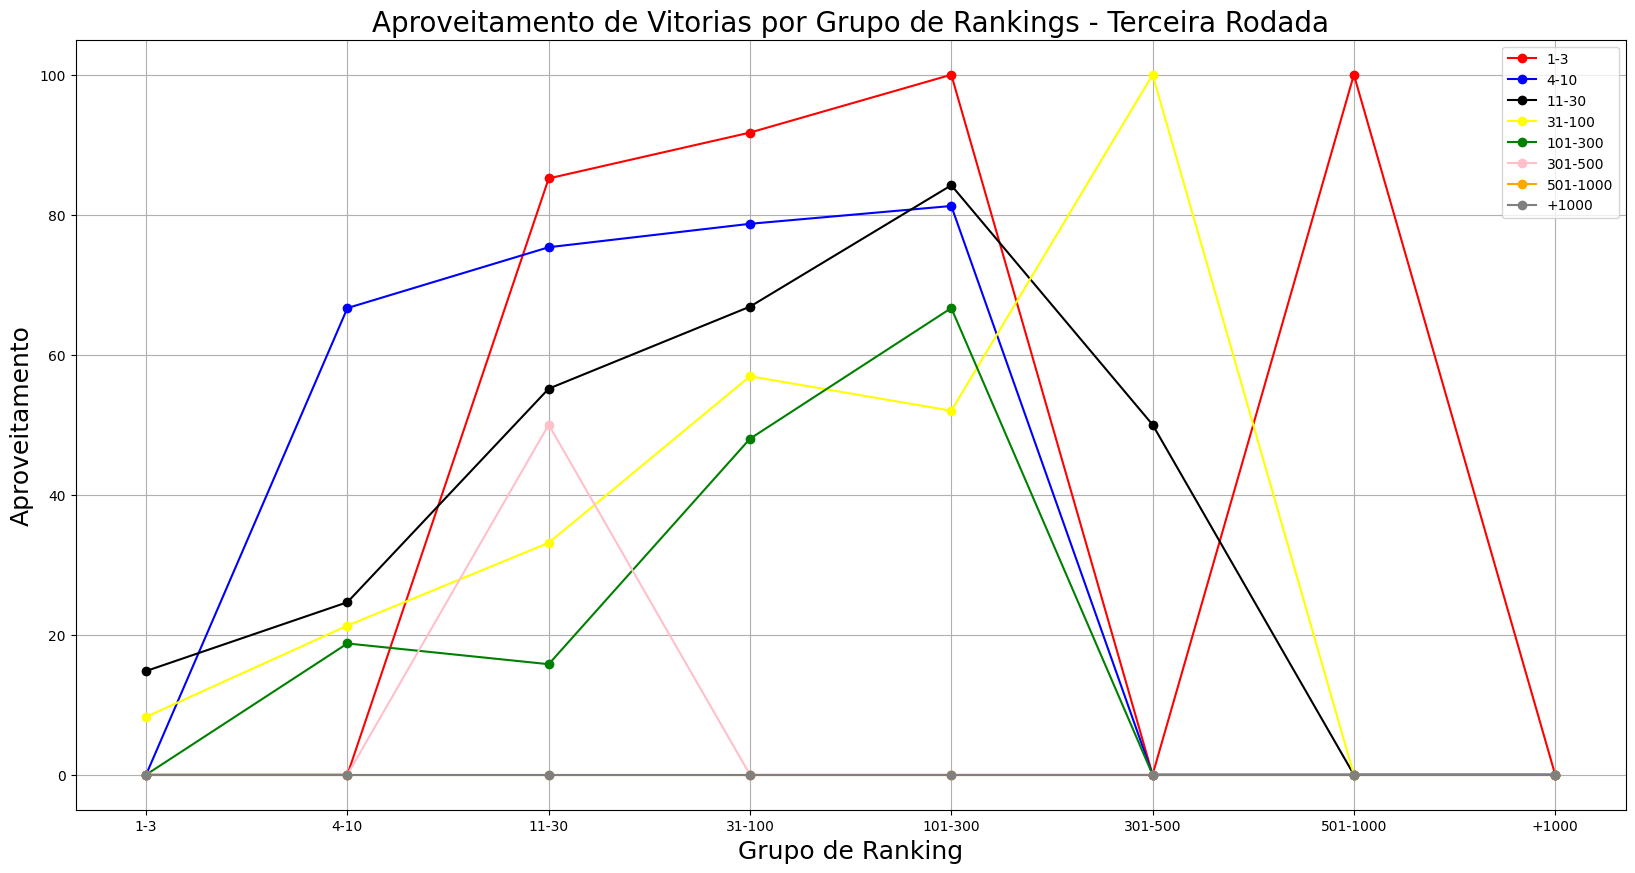

In [472]:
title = 'Aproveitamento de Vitorias por Grupo de Rankings - Terceira Rodada' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

**4ª Rodada**

In [473]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[j]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == '4th Round')) |
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[j])) &
             (data['Round'] == '4th Round'))
        ]

        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)

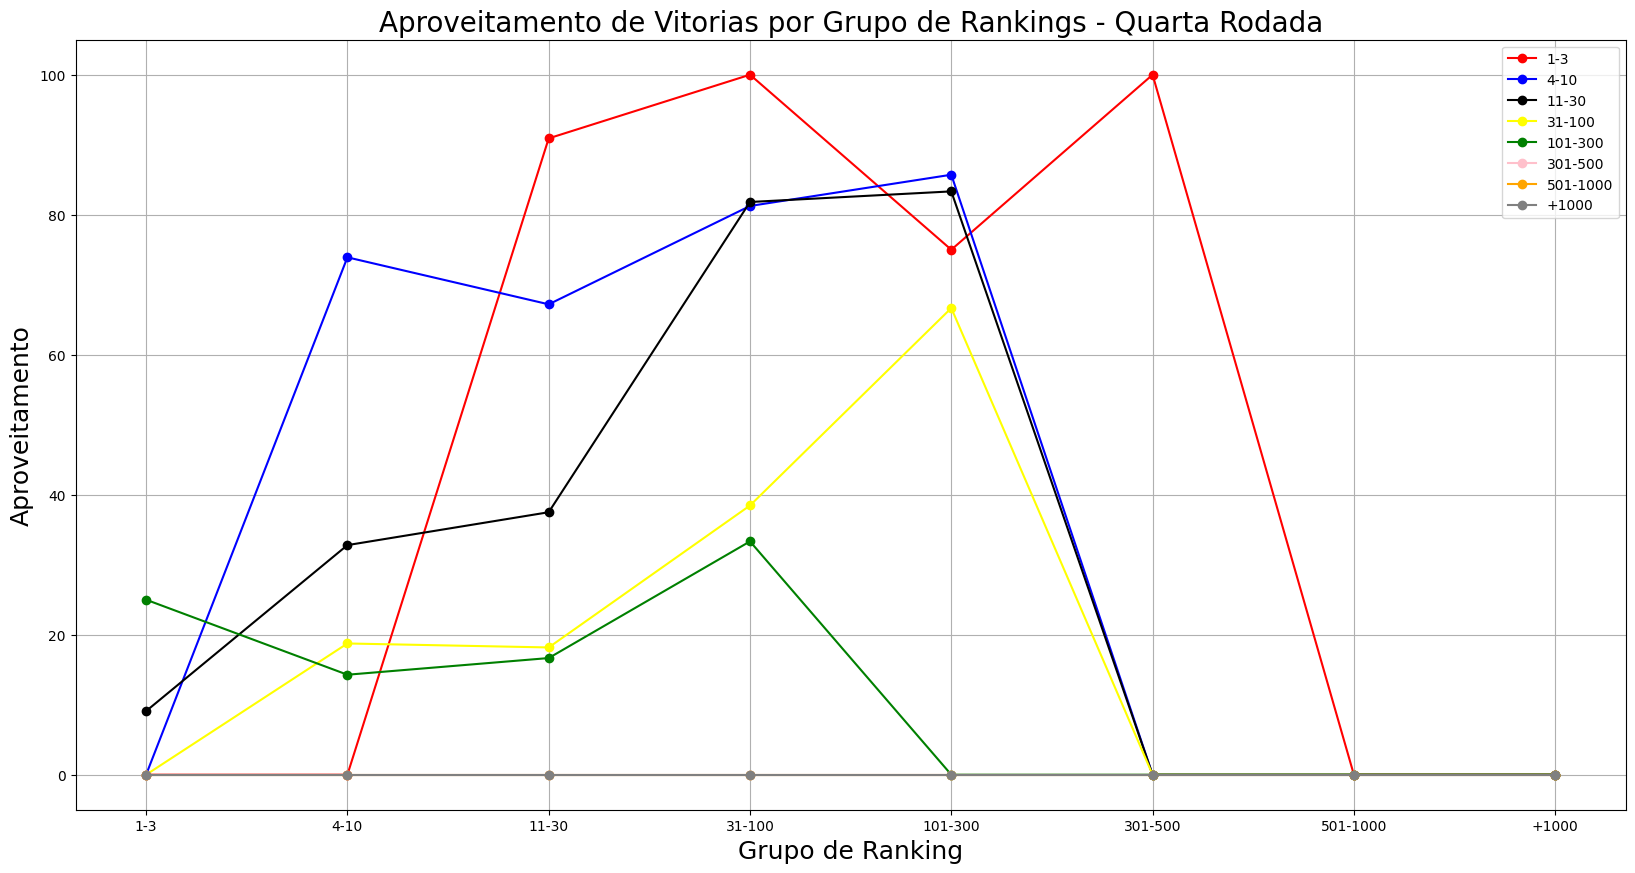

In [474]:
title = 'Aproveitamento de Vitorias por Grupo de Rankings - Quarta Rodada' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

**Quartas de Final**

In [475]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[j]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == 'Quarterfinals')) |
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[j])) &
             (data['Round'] == 'Quarterfinals'))
        ]

        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)

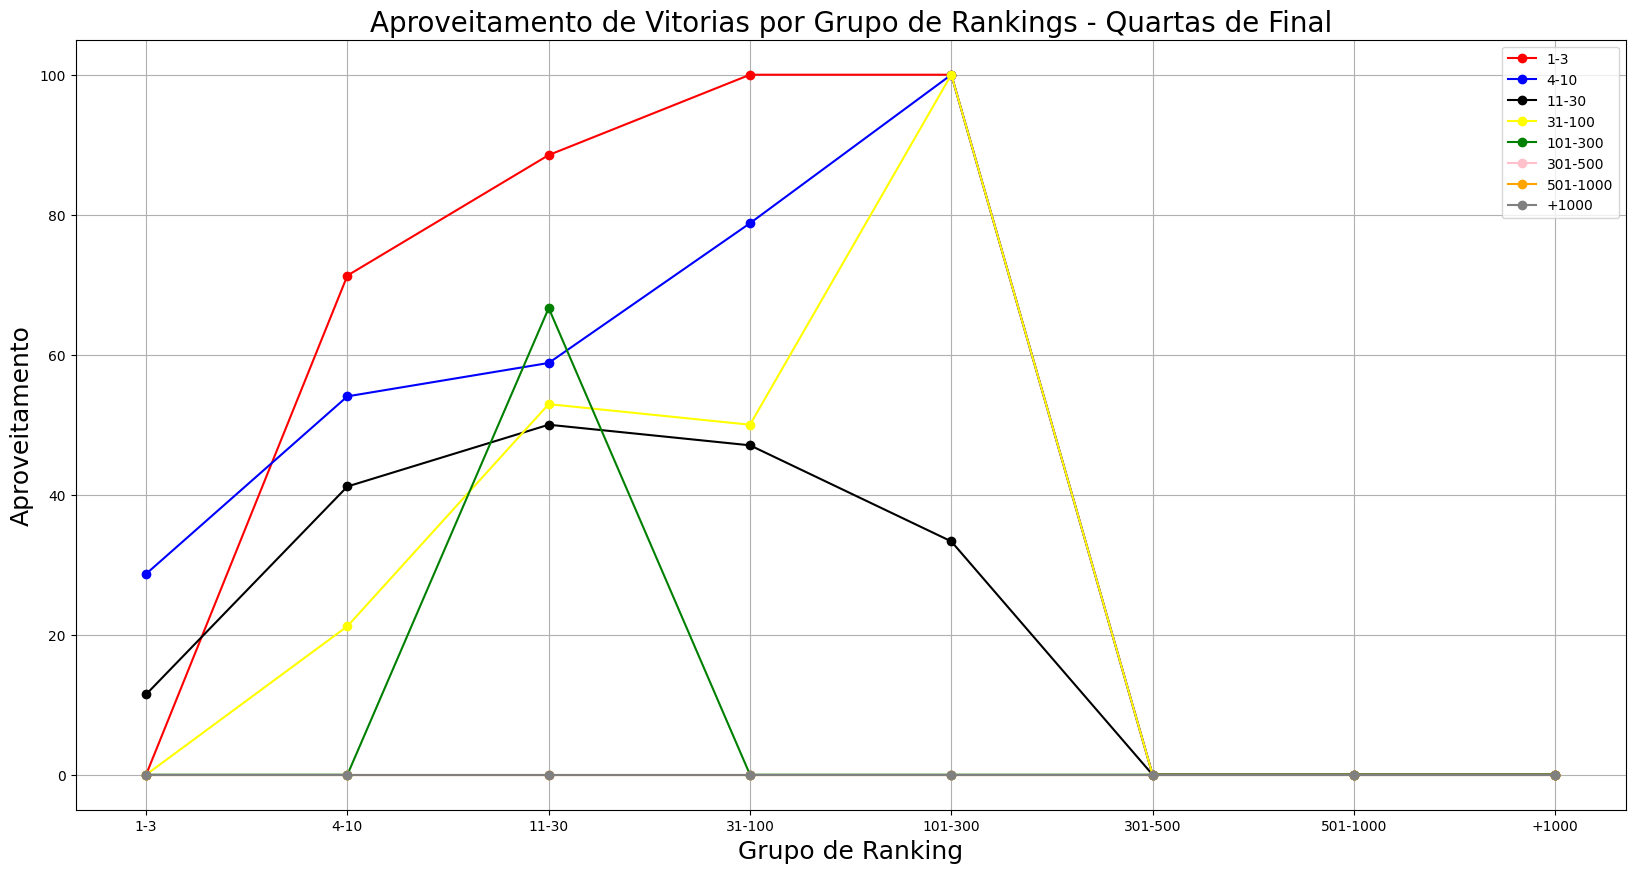

In [476]:
title = 'Aproveitamento de Vitorias por Grupo de Rankings - Quartas de Final' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

**Semi-Final**

In [477]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[j]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == 'Semifinals')) |
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[j])) &
             (data['Round'] == 'Semifinals'))
        ]

        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)

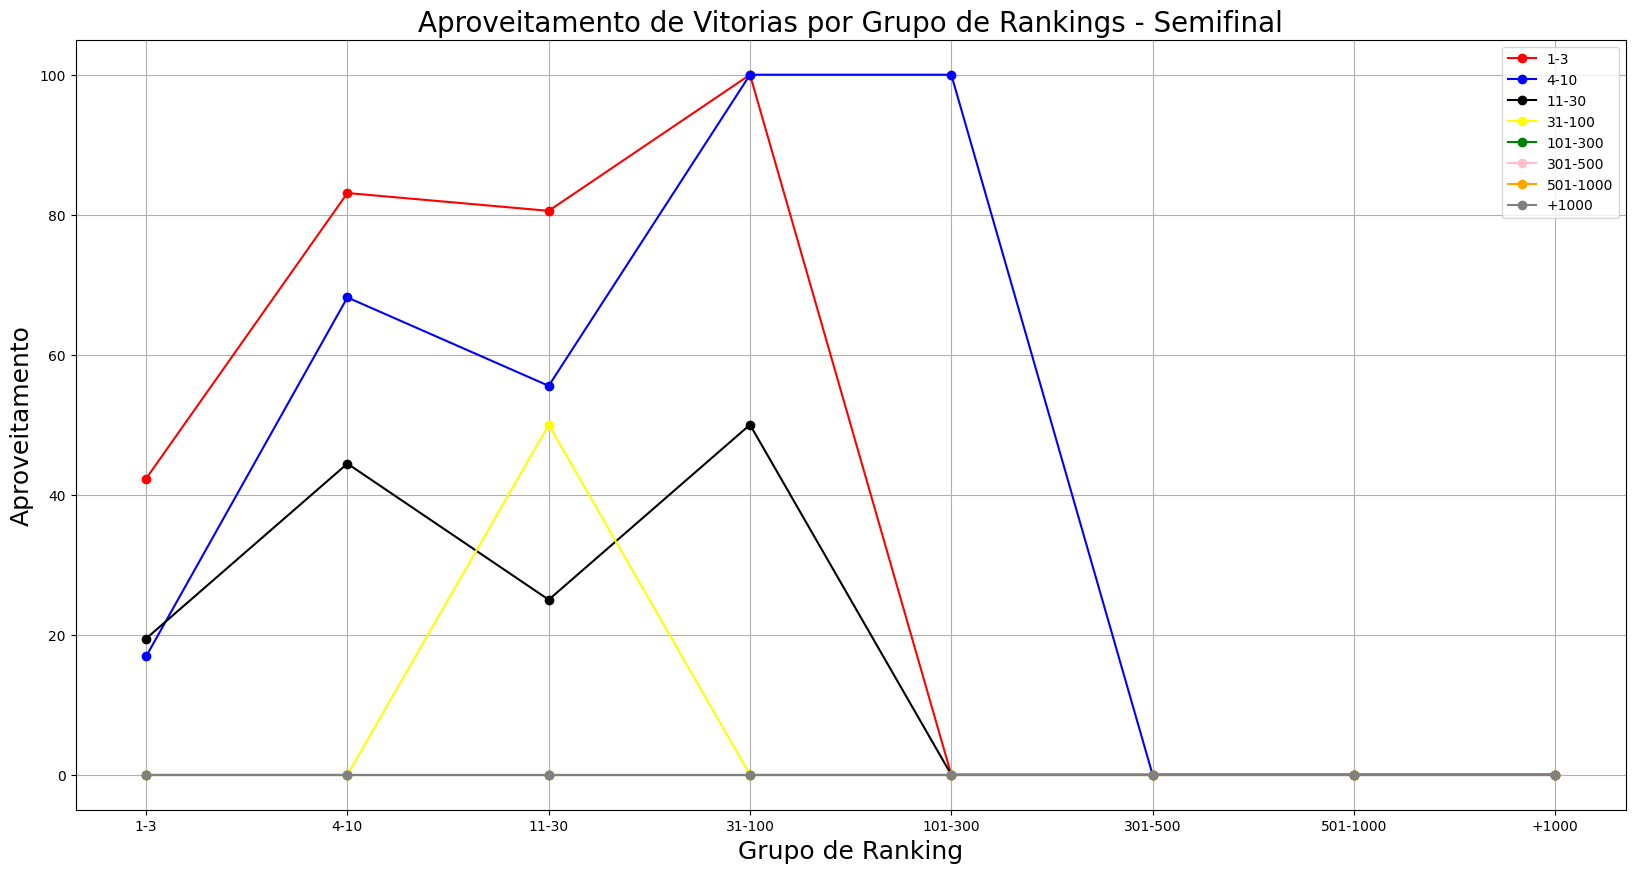

In [478]:
title = 'Aproveitamento de Vitorias por Grupo de Rankings - Semifinal' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

**Final**

In [479]:
result = []
for k in range(len(RankingsGroup)):
    for j in range(len(RankingsGroup)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[j]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Round'] == 'The Final')) |
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k]) &
              (data['LRank'] <= RankingsGroup['MaxRank'].iloc[j]) & (data['LRank'] >= RankingsGroup['MinRank'].iloc[j])) &
             (data['Round'] == 'The Final'))
        ]

        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        if k<j:
            aux = countW
            countW = countL
            countL = aux
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
        else:
            rate = 0
            result.append({
            'WGroup': j,
            'LGroup': k,
            'countW': countW,
            'countL': countL,
            'Rate': rate
            })
result = pd.DataFrame(result)

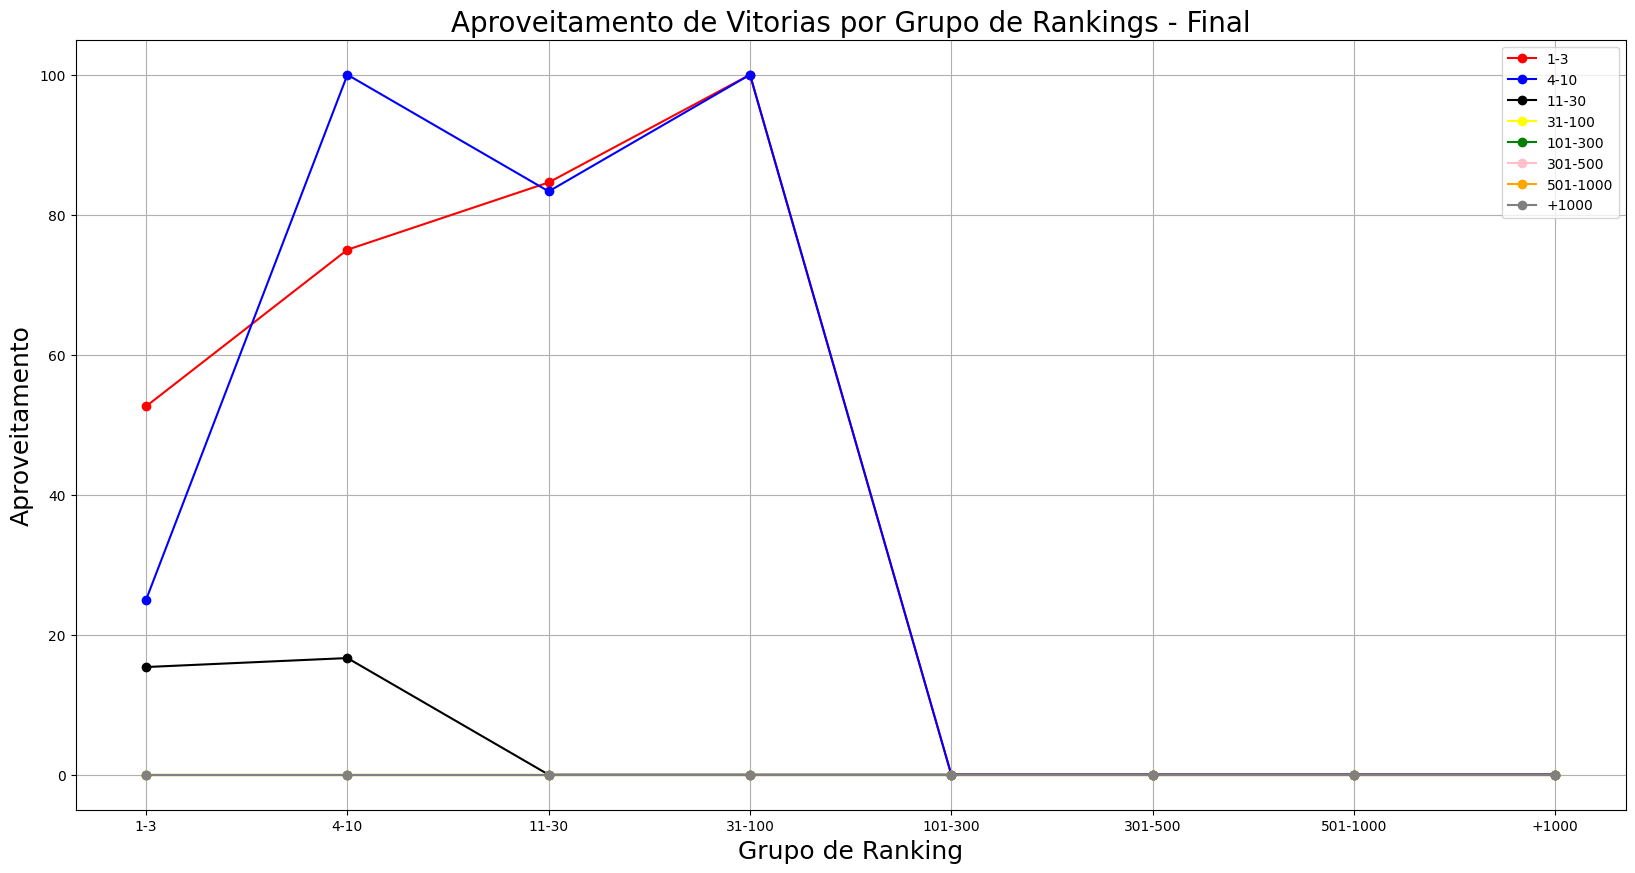

In [480]:
title = 'Aproveitamento de Vitorias por Grupo de Rankings - Final' 
labels = ["1-3", "4-10", "11-30", "31-100","101-300", "301-500", "501-1000", "+1000"]
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(labels, result.loc[result['WGroup']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(labels, result.loc[result['WGroup']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('Grupo de Ranking', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

A partir dos gráficos apresentados, reafirmaram as conclusões feitas nas duas analises iniciais com tendencia de maior aproveitamento dos rankings menores e também de maior aproveitamento de acordo com a discrepância entre os rankings. Alguns dados não seguiram a tendência, o que é explicado pela falta de quantidade de dados daquele caso, resepresentando com menor assertividade aquela hipotese.

#### Por Superficie

In [609]:
surfaces = data['Surface'].unique()
surfaces

array(['Hard', 'Clay', 'Grass'], dtype=object)

In [610]:
result = []

In [611]:
dataHard = data.loc[data['Surface']=='Hard']
count = 0
for i in range(len(dataHard)):
    if dataHard['WRank'].iloc[i] < dataHard['LRank'].iloc[i]:
        count = count +1
rate = count/len(dataHard)*100
result.append({
'countW': count,
'countL': len(dataHard) - count,
'Group': -1,
'Surface': 'Hard',
'Rate': rate  
})
print("Resultado: {:.2f}%".format(rate))

Resultado: 69.94%


In [612]:
dataClay = data.loc[data['Surface']=='Clay']
count = 0
for i in range(len(dataClay)):
    if dataClay['WRank'].iloc[i] < dataClay['LRank'].iloc[i]:
        count = count +1
rate = count/len(dataClay)*100
result.append({
'countW': count,
'countL': len(dataHard) - count,
'Group': -1,
'Surface': 'Clay',
'Rate': rate  
})
print("Resultado: {:.2f}%".format(rate))

Resultado: 71.40%


In [613]:
dataGrass = data.loc[data['Surface']=='Grass']
count = 0
for i in range(len(dataGrass)):
    if dataGrass['WRank'].iloc[i] < dataGrass['LRank'].iloc[i]:
        count = count +1
rate = count/len(dataGrass)*100
result.append({
'countW': count,
'countL': len(dataHard) - count,
'Group': -1,
'Surface': 'Grass',
'Rate': rate  
})
print("Resultado: {:.2f}%".format(rate))

Resultado: 72.24%


In [614]:
for k in range(len(RankingsGroup)):
    for j in range(len(surfaces)):
        countW = 0
        countL = 0
        aux_data = data.loc[
            (((data['WRank'] <= RankingsGroup['MaxRank'].iloc[k]) & (data['WRank'] >= RankingsGroup['MinRank'].iloc[k])) &
             (data['Surface'] == surfaces[j])) | (((data['LRank'] <= RankingsGroup['MaxRank'].iloc[k]) & 
            (data['LRank'] >= RankingsGroup['MinRank'].iloc[k])) & (data['Surface'] == surfaces[j]))
        ]
        for i in range(len(aux_data)):
            if aux_data['WRank'].iloc[i] < aux_data['LRank'].iloc[i]:
                countW = countW  +1
            else:
                countL = countL +1
        
        if len(aux_data)>0:
            rate = countW / len(aux_data) * 100
            result.append({
            'countW': countW,
            'countL': countL,
            'Group': k,
            'Surface': surfaces[j],
            'Rate': rate
            })

result = pd.DataFrame(result)

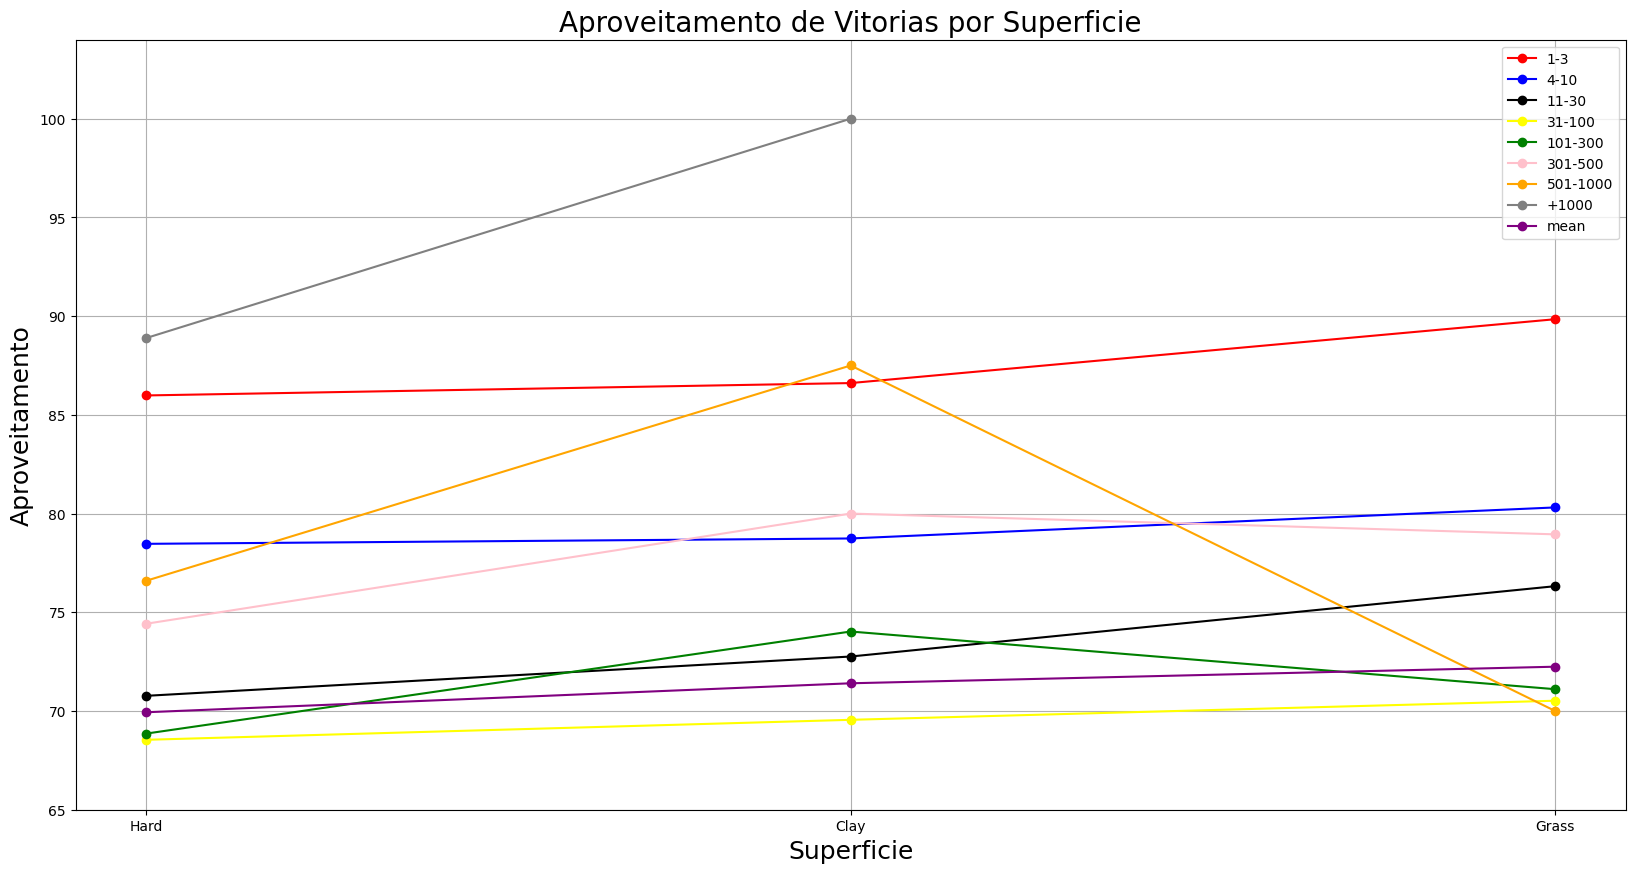

In [615]:
title = 'Aproveitamento de Vitorias por Superficie' 
f, ax = plt.subplots(figsize=(20, 10))

ax.plot(result.loc[result['Group']==0]['Surface'].unique(), result.loc[result['Group']==0]['Rate'], label='1-3', color = 'red',  marker='o')
ax.plot(result.loc[result['Group']==1]['Surface'].unique(), result.loc[result['Group']==1]['Rate'], label='4-10', color = 'blue',  marker='o')
ax.plot(result.loc[result['Group']==2]['Surface'].unique(), result.loc[result['Group']==2]['Rate'], label='11-30', color = 'black',  marker='o')
ax.plot(result.loc[result['Group']==3]['Surface'].unique(), result.loc[result['Group']==3]['Rate'], label='31-100', color = 'yellow',  marker='o')
ax.plot(result.loc[result['Group']==4]['Surface'].unique(), result.loc[result['Group']==4]['Rate'], label='101-300', color = 'green',  marker='o')
ax.plot(result.loc[result['Group']==5]['Surface'].unique(), result.loc[result['Group']==5]['Rate'], label='301-500', color = 'pink',  marker='o')
ax.plot(result.loc[result['Group']==6]['Surface'].unique(), result.loc[result['Group']==6]['Rate'], label='501-1000', color = 'orange',  marker='o')
ax.plot(result.loc[result['Group']==7]['Surface'].unique(), result.loc[result['Group']==7]['Rate'], label='+1000', color = 'grey',  marker='o')
ax.plot(result.loc[result['Group']==-1]['Surface'].unique(), result.loc[result['Group']==-1]['Rate'], label='mean', color = 'purple',  marker='o')
ax.grid(linestyle='-')
ax.set_ylim(65,104)
ax.set_xlabel('Superficie', size='18')
ax.set_ylabel('Aproveitamento', size='18')
ax.set_title(title, size='20')
plt.legend()
plt.show()

A quadra de grama, o piso mais rápido, apresentou o maior aproveitamento do favoritismo. Entretanto, o saibro apresentou uma taxa superior à quadra de cimento (também conhecida como quadra rápida). Logo, a hipotese que diz que em superficies mais rápidas apresentam uma maior tendência de favoritismo se torna apenas parcialmente verdadeira. Vale também citar que a diferença entre as superficies foram bem pequenas, não apresentando nenhuma diferença significativa.

### Regressão

Em seguida, será relizada uma regressão linear dos dados do Ranking do Vencedor x Ranking do Perdedor.
A regressão será realizada apenas entre os jogadores com ranking menor que 400, onde há a massiva maioria dos jogos.

In [964]:
regData = data.loc[(data['WRank']<400) & (data['LRank']<400)]
X = regData['WRank'].values.reshape(-1,1)
Y = regData['LRank'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)


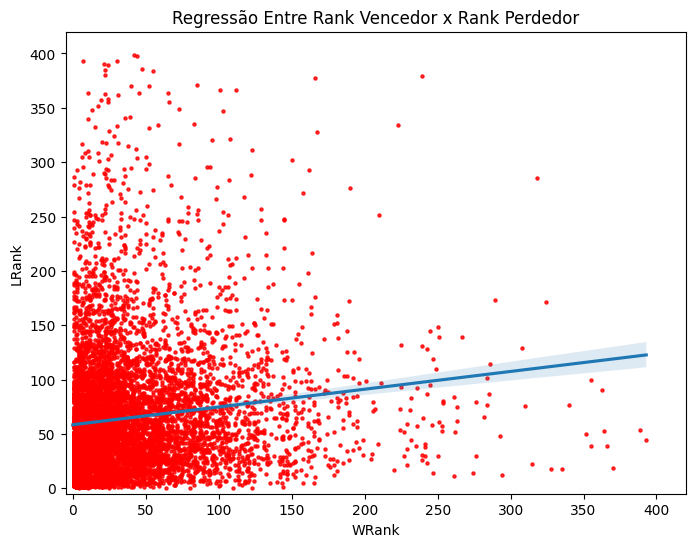

In [965]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter_kws = {'s': 5, 'color': 'red'} 
sns.regplot(x='WRank', y='LRank', data=regData, ax=ax, scatter_kws=scatter_kws)
ax.set_title('Regressão Entre Rank Vencedor x Rank Perdedor')
ax.set_ylim(-5,420)
ax.set_xlim(-5,420)
plt.show()


Com o modelo da regressão podemos entender algumas têndencias porém se demostrou bastante falho. Irei numerar algumas conclusões importantes que pôde ser observada.
1. Jogos com Vencedores com o rank 1-10 demostrou uma têndencia esperada no começo da reta, fazendo sua origem em y ser maior que 0. Mostrando favoritismo desses jogadores.
2. A inclinação da reta determinada pelos jogos com jogadores com rankings pequenos fez com que os jogos com jogadores com ranking maiores não demonstrasse a realidade. A partir do WRank 100 já podemos observar que o azarão começa a ter probabilidade de vencer maior que o favorito. 
3. Poucos jogos entre jogadores de ranking baixo e ranking alto faz com esse jogos representem pouco peso na determinação da regressão e demonstra uma tendencia falha. Pôde-se observar que,jogos entre jogadores de ranking 300-100 e 1-10, o jogador de ranking maior se torna favorito. O que já foi demonstrado anteriormente não ser verdade.

### Treinamento MLP

Com o intuito de se descobrir algum padrão e se obter um algoritmo de previsão melhor, será realizado um modelo de rede neural artificial MLP para tentar obter uma previsão de resultado mais interessante.

In [954]:
data_copy = data.copy()
data_copy.rename(columns={'WRank': 'P1Rank', 'LRank': 'P2Rank'}, inplace=True)
dataMLP = data_copy[['Series', 'Court', 'Surface', 'Round', 'P1Rank', 'P2Rank']]

In [955]:
result = []
for i in range(len(dataMLP)):
    if dataMLP['P2Rank'].iloc[i] < dataMLP['P1Rank'].iloc[i]:
        result.append(0)
    else:
        result.append(1)

In [956]:
mask = dataMLP['P2Rank'] < dataMLP['P1Rank']
dataMLP.loc[mask, ['P1Rank', 'P2Rank']] = dataMLP.loc[mask, ['P2Rank', 'P1Rank']].values

In [957]:
labelencoder_previsores = LabelEncoder()
dataMLP.loc[:, 'Series'] = labelencoder_previsores.fit_transform(dataMLP['Series'])
dataMLP.loc[:, 'Court'] = labelencoder_previsores.fit_transform(dataMLP['Court'])
dataMLP.loc[:, 'Surface'] = labelencoder_previsores.fit_transform(dataMLP['Surface'])
dataMLP.loc[:, 'Round'] = labelencoder_previsores.fit_transform(dataMLP['Round'])


In [958]:
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3])], remainder='passthrough')
dataMLP = onehotencorder.fit_transform(dataMLP)


In [959]:
dataMLP = pd.DataFrame(dataMLP)
dataMLP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,80.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,47.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,450.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,251.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,7.0
8384,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,142.0
8385,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,12.0
8386,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,7.0


In [962]:
accuracy = []
for i in range(10):
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(dataMLP, result, test_size=0.2)
    # Criar o classificador MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh')
    # Treinar o classificador
    mlp.fit(X_train, y_train)
    # Avaliar o desempenho do classificador
    accuracy.append(float(mlp.score(X_test, y_test)))


C:\Users\Elias Faria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


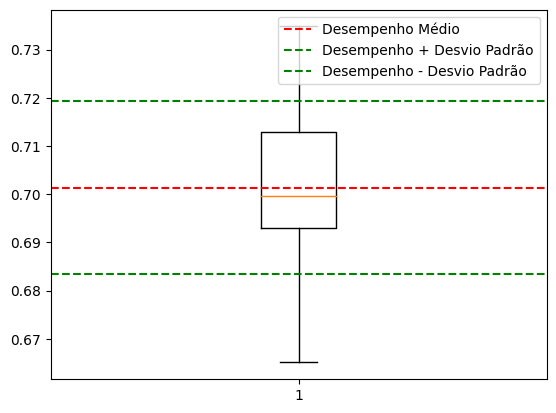

In [968]:
accuracy = np.array(accuracy)
# Calcular média e desvio padrão
media = np.mean(accuracy)
desvio_padrao = np.std(accuracy)

# Plotar boxplot com média e desvio padrão
plt.boxplot(accuracy)
plt.axhline(media, color='r', linestyle='--', label='Desempenho Médio')
plt.axhline(media + desvio_padrao, color='g', linestyle='--', label='Desempenho + Desvio Padrão')
plt.axhline(media - desvio_padrao, color='g', linestyle='--', label='Desempenho - Desvio Padrão')
plt.legend(loc='upper right')
plt.show()

O modelo apresentou desempenho semelhante ao indicie de aproveitamento dos favoritos, logo, pode se dizer que o modelo não conseguiu identificar nenhum padrão significativo que demonstrasse uma falha no ranking da ATP.

### Previsão de set jogados

Nessa etapa, será realizada o treinamento de dois modelos para prever a quantidade de sets que serão jogados em uma partida. Será dividido em jogos de melhor de 5 sets e jogos melhor de 3 sets.

#### Melhor de 5 Sets

In [988]:
Tset = []
DifRank = []
for i in range(len(data)):
    Tset.append(data['Wsets'].iloc[i] + data['Lsets'].iloc[i])
    DifRank.append(abs(data['WRank'].iloc[i] - data['LRank'].iloc[i]))
data['Tsets'] = Tset
data['DifRank'] = DifRank

In [989]:
data5sets = data.loc[data['Best of'] == 5 ]
data3sets = data.loc[data['Best of'] == 3 ]
data5sets = data5sets.dropna(subset=['Tsets'])
data3sets = data3sets.dropna(subset=['Tsets'])

In [990]:
data5sets_copy = data5sets.copy()
data5sets_copy.rename(columns={'WRank': 'P1Rank', 'LRank': 'P2Rank'}, inplace=True)
data5setsMLP = data5sets_copy[['Series', 'Court', 'Surface', 'Round', 'DifRank']]

In [991]:
labelencoder_previsores = LabelEncoder()
data5setsMLP.loc[:, 'Series'] = labelencoder_previsores.fit_transform(data5setsMLP['Series'])
data5setsMLP.loc[:, 'Court'] = labelencoder_previsores.fit_transform(data5setsMLP['Court'])
data5setsMLP.loc[:, 'Surface'] = labelencoder_previsores.fit_transform(data5setsMLP['Surface'])
data5setsMLP.loc[:, 'Round'] = labelencoder_previsores.fit_transform(data5setsMLP['Round'])


In [992]:
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3])], remainder='passthrough')
data5setsMLP = onehotencorder.fit_transform(data5setsMLP)

In [993]:
data5setsMLP = pd.DataFrame(data5setsMLP)
Tsets = data5sets[['Tsets']].values
Tsets = Tsets.ravel()

In [994]:
accuracy5sets = []
for i in range (10):
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(data5setsMLP, Tsets, test_size=0.2)
    # Criar o classificador MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu')
    # Treinar o classificador
    mlp.fit(X_train, y_train)
    # Avaliar o desempenho do classificador
    accuracy5sets.append(mlp.score(X_test, y_test)*100)

#### Melhor de 3 Sets

In [995]:
data3sets_copy = data3sets.copy()
data3sets_copy.rename(columns={'WRank': 'P1Rank', 'LRank': 'P2Rank'}, inplace=True)
data3setsMLP = data3sets_copy[['Series', 'Court', 'Surface', 'Round', 'DifRank']]

In [996]:
labelencoder_previsores = LabelEncoder()
data3setsMLP.loc[:, 'Series'] = labelencoder_previsores.fit_transform(data3setsMLP['Series'])
data3setsMLP.loc[:, 'Court'] = labelencoder_previsores.fit_transform(data3setsMLP['Court'])
data3setsMLP.loc[:, 'Surface'] = labelencoder_previsores.fit_transform(data3setsMLP['Surface'])
data3setsMLP.loc[:, 'Round'] = labelencoder_previsores.fit_transform(data3setsMLP['Round'])

In [997]:
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3])], remainder='passthrough')
data3setsMLP = onehotencorder.fit_transform(data3setsMLP)

In [691]:
result = []
for i in range(len(X_test)):
    X_test_reshaped = X_test.iloc[i].values.reshape(1, -1)
    result.append(mlp.predict(X_test_reshaped))
result

[array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [998]:
data3setsMLP = pd.DataFrame(data3setsMLP)
Tsets = data3sets[['Tsets']].values
Tsets = Tsets.ravel()

In [999]:
accuracy3sets = []
for i in range(10):
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(data3setsMLP, Tsets, test_size=0.2)
    # Criar o classificador MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu')
    # Treinar o classificador
    mlp.fit(X_train, y_train)
    # Avaliar o desempenho do classificador
    accuracy3sets.append(float(mlp.score(X_test, y_test))*100)

In [1000]:
accuracy5sets = np.array(accuracy5sets)
accuracy3sets = np.array(accuracy3sets)

**Resultado:**

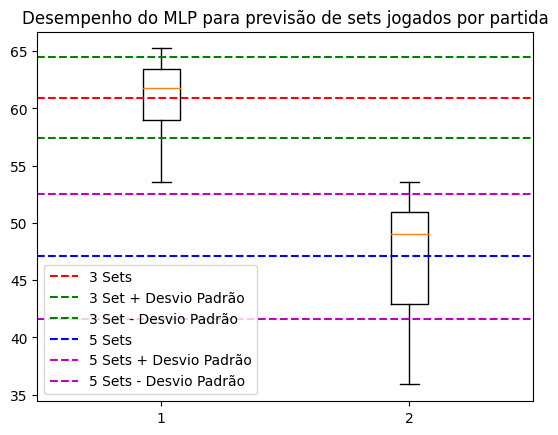

In [1001]:
# Dados para o primeiro boxplot
media1 = np.mean(accuracy3sets)
desvio_padrao1 = np.std(accuracy3sets)

# Dados para o segundo boxplot
media2 = np.mean(accuracy5sets)
desvio_padrao2 = np.std(accuracy5sets)

# Plotar os dois boxplots
plt.boxplot([accuracy3sets, accuracy5sets])
plt.axhline(media1, color='r', linestyle='--', label='3 Sets')
plt.axhline(media1 + desvio_padrao1, color='g', linestyle='--', label='3 Set + Desvio Padrão')
plt.axhline(media1 - desvio_padrao1, color='g', linestyle='--', label='3 Set - Desvio Padrão')
plt.axhline(media2, color='b', linestyle='--', label='5 Sets')
plt.axhline(media2 + desvio_padrao2, color='m', linestyle='--', label='5 Sets + Desvio Padrão')
plt.axhline(media2 - desvio_padrao2, color='m', linestyle='--', label='5 Sets - Desvio Padrão')
plt.title('Desempenho do MLP para previsão de sets jogados por partida')
plt.legend()
plt.show()

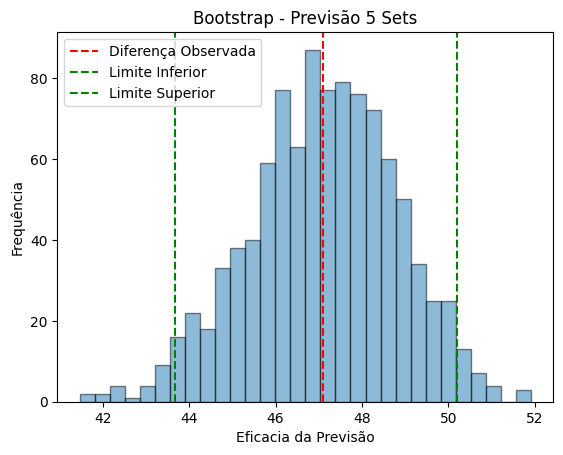

Média Observada: 47.1039603960396
Intervalo de Confiança 95.0%: (43.67419554455446, 50.18595297029703)


In [1015]:
# Conjunto de dados
dados = accuracy5sets

# Diferença das médias observadas
diferenca_obs = np.mean(dados)

# Número de iterações bootstrap
n_bootstrap = 1000

# Vetor para armazenar as diferenças das médias bootstrap
diferencas_bootstrap = np.zeros(n_bootstrap)

# Bootstrap
for i in range(n_bootstrap):
    # Amostra bootstrap
    amostra_bootstrap = np.random.choice(dados, size=len(dados), replace=True)
    
    # Diferença das médias bootstrap
    diferenca_bootstrap = np.mean(amostra_bootstrap)
    diferencas_bootstrap[i] = diferenca_bootstrap

# Intervalo de confiança bootstrap
confianca = 0.95
percentil_inferior = (1 - confianca) / 2
percentil_superior = 1 - percentil_inferior
limite_inferior = np.percentile(diferencas_bootstrap, percentil_inferior * 100)
limite_superior = np.percentile(diferencas_bootstrap, percentil_superior * 100)

# Plotando histograma das diferenças das médias bootstrap
plt.hist(diferencas_bootstrap, bins=30, edgecolor='black', alpha=0.5)
plt.axvline(x=diferenca_obs, color='red', linestyle='--', label='Diferença Observada')
plt.axvline(x=limite_inferior, color='green', linestyle='--', label='Limite Inferior')
plt.axvline(x=limite_superior, color='green', linestyle='--', label='Limite Superior')
plt.xlabel('Eficacia da Previsão')
plt.ylabel('Frequência')
plt.title('Bootstrap - Previsão 5 Sets')
plt.legend()
plt.show()

# Resultados
print("Média Observada:", diferenca_obs)
print(f"Intervalo de Confiança {confianca * 100}%:", (limite_inferior, limite_superior))


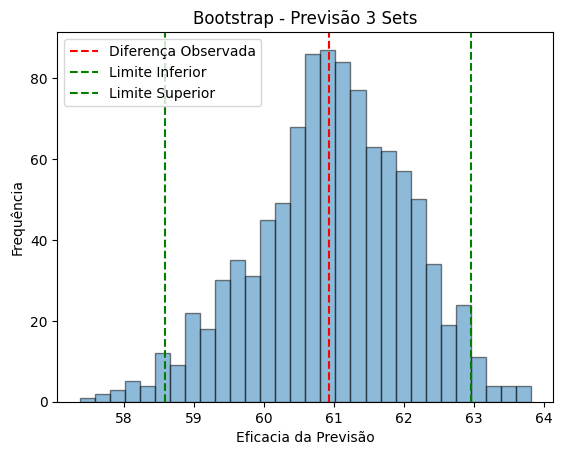

Média Observada: 60.93023255813953
Intervalo de Confiança 95.0%: (58.58110465116279, 62.95348837209301)


In [1017]:
# Conjunto de dados
dados = accuracy3sets

# Diferença das médias observadas
diferenca_obs = np.mean(dados)

# Número de iterações bootstrap
n_bootstrap = 1000

# Vetor para armazenar as diferenças das médias bootstrap
diferencas_bootstrap = np.zeros(n_bootstrap)

# Bootstrap
for i in range(n_bootstrap):
    # Amostra bootstrap
    amostra_bootstrap = np.random.choice(dados, size=len(dados), replace=True)
    
    # Diferença das médias bootstrap
    diferenca_bootstrap = np.mean(amostra_bootstrap)
    diferencas_bootstrap[i] = diferenca_bootstrap

# Intervalo de confiança bootstrap
confianca = 0.95
percentil_inferior = (1 - confianca) / 2
percentil_superior = 1 - percentil_inferior
limite_inferior = np.percentile(diferencas_bootstrap, percentil_inferior * 100)
limite_superior = np.percentile(diferencas_bootstrap, percentil_superior * 100)

# Plotando histograma das diferenças das médias bootstrap
plt.hist(diferencas_bootstrap, bins=30, edgecolor='black', alpha=0.5)
plt.axvline(x=diferenca_obs, color='red', linestyle='--', label='Diferença Observada')
plt.axvline(x=limite_inferior, color='green', linestyle='--', label='Limite Inferior')
plt.axvline(x=limite_superior, color='green', linestyle='--', label='Limite Superior')
plt.xlabel('Eficacia da Previsão')
plt.ylabel('Frequência')
plt.title('Bootstrap - Previsão 3 Sets')
plt.legend()
plt.show()

# Resultados
print("Média Observada:", diferenca_obs)
print(f"Intervalo de Confiança {confianca * 100}%:", (limite_inferior, limite_superior))


Apesar de não apresentar uma eficência muito elevada, o modelo conseguiu prever com certa qualidade a quantidade de sets jogados, levando em consideração a dificuldade de se realizar essa previsão.

### Conclusão

Com base nas análises realizadas, podemos tirar algumas conclusões sobre o favoritismo e os resultados no tênis:

1. Os jogadores com rankings mais altos têm uma tendência geral de obter melhores resultados. Cada grupo de jogadores com rankings mais baixos também apresentou um desempenho relativamente melhor.

2. Conforme o torneio avança, os jogadores com rankings entre 1 e 3 e entre 4 e 10 tendem a ter um desempenho um pouco pior. Isso ocorre porque, nessas fases, eles enfrentam jogadores de grupos com rankings mais altos. Por outro lado, os demais grupos mostram um aumento no desempenho, possivelmente devido à maior diferença de rankings entre os jogadores.

3. Em relação às superfícies das quadras, observamos que a grama, que é considerada uma superfície mais rápida, tem um aproveitamento ligeiramente melhor. No entanto, o saibro também apresenta um desempenho superior em comparação com as quadras de cimento, que são consideradas rápidas. Portanto, embora as superfícies mais rápidas estejam associadas a um maior favoritismo, as diferenças entre elas não são muito significativas.

4. Ao utilizar modelos de regressão para prever os resultados, constatamos algumas tendências, mas também identificamos algumas limitações. Os jogadores com rankings de 1 a 10 têm uma maior probabilidade de vitória, como era esperado. No entanto, a influência dos jogadores com rankings mais baixos afeta a precisão das previsões para jogadores com rankings mais altos. A partir do ranking 100, os jogadores menos favorecidos começam a ter uma chance maior de vitória do que os favoritos. É importante ressaltar que a falta de jogos entre jogadores com grandes diferenças de ranking limita a confiabilidade dessas previsões.

5. O modelo MLP utilizado também não apresentou resultados significativamente diferentes dos índices de favoritismo. Isso indica que o modelo não foi capaz de identificar padrões significativos que questionassem a validade do ranking da ATP.

6. O modelo MLP para prever a quantidade de sets jogados em uma partida, embora não tenham alcançado uma precisão muito alta, eles foram capazes de prever com relativa qualidade a quantidade de sets, considerando a dificuldade dessa previsão.

Em resumo, as análises realizadas nos permitem entender algumas tendências e padrões relacionados ao favoritismo e aos resultados no tênis. No entanto, é importante lembrar que as conclusões obtidas são baseadas nos dados disponíveis e nas características específicas do esporte, e que existem limitações inerentes a essas análises.

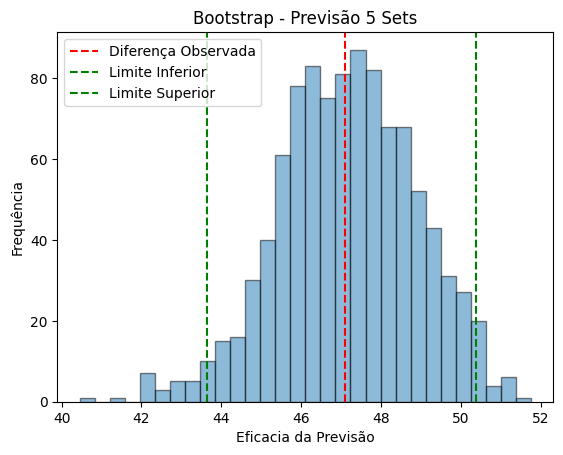

Média Observada: 47.1039603960396
Intervalo de Confiança 95.0%: (43.6509900990099, 50.38397277227723)


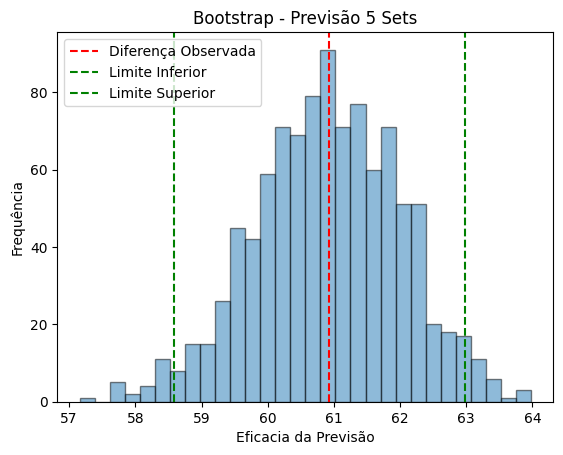

Média Observada: 60.93023255813953
Intervalo de Confiança 95.0%: (58.581104651162796, 62.9767441860465)


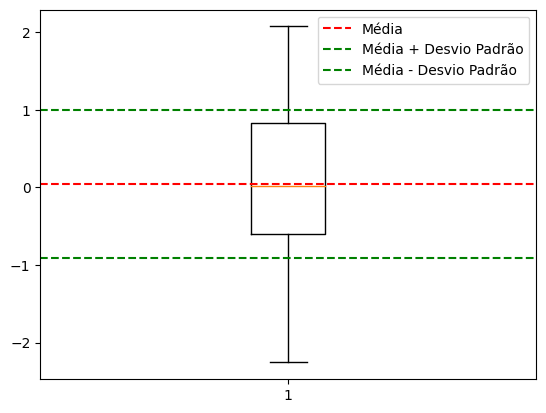

In [912]:
# Exemplo de dados
dados = np.random.normal(loc=0, scale=1, size=(100,))

# Calcular média e desvio padrão
media = np.mean(dados)
desvio_padrao = np.std(dados)

# Plotar boxplot com média e desvio padrão
plt.boxplot(dados)
plt.axhline(media, color='r', linestyle='--', label='Média')
plt.axhline(media + desvio_padrao, color='g', linestyle='--', label='Média + Desvio Padrão')
plt.axhline(media - desvio_padrao, color='g', linestyle='--', label='Média - Desvio Padrão')
plt.legend()
plt.show()